In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('datasets/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
1,2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2,2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
3,2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
4,2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100


In [3]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [4]:
# Set Date to be in the index:
df.set_index('Date', inplace = True)

# Sort the index:
df.sort_index(inplace=True)

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [8]:
df['2020-03']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.003296,85349300
2020-03-03,303.670013,304.000000,285.799988,289.320007,288.538940,79868900
2020-03-04,296.440002,303.399994,293.130005,302.739990,301.922699,54794600
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.129211,46893200
2020-03-06,282.000000,290.820007,281.230011,289.029999,288.249725,56544200
2020-03-09,263.750000,278.089996,263.000000,266.170013,265.451447,71686200
2020-03-10,277.140015,286.440002,269.369995,285.339996,284.569672,71322500
2020-03-11,277.390015,281.220001,271.859985,275.429993,274.686432,63899700
2020-03-12,255.940002,270.000000,248.000000,248.229996,247.559860,104618500


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

You can also filter by month:

## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [12]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-30,188.324446,189.411112,187.095833,188.274999,183.245137,2.344881e+07
2018-09-30,208.025556,209.894127,206.520952,208.300001,203.173003,2.814258e+07
2018-12-31,194.530635,196.867620,191.265873,193.912064,189.743479,4.206345e+07
2019-03-31,169.343116,171.056722,167.879180,169.663770,166.737421,3.199360e+07
2019-06-30,194.462538,196.558254,192.990794,194.892699,192.253766,2.794860e+07
2019-09-30,209.085312,211.013750,207.306093,209.120781,207.104067,2.652498e+07
2019-12-31,256.569998,258.673125,254.903282,257.328749,255.726776,2.584114e+07
2020-03-31,293.131775,298.772418,289.030323,294.163709,293.071569,4.933183e+07
2020-06-30,277.327407,281.624446,274.130743,278.311110,277.590772,3.869858e+07


In [16]:
df.rolling(5).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-16,187.818002,189.098001,186.812000,188.279996,183.127625,23571720.0
...,...,...,...,...,...,...
2020-05-04,287.038000,292.544000,284.522009,288.467999,287.689233,40326720.0
2020-05-05,289.034003,295.578003,287.774005,292.264002,291.474988,42114040.0
2020-05-06,292.179999,298.291998,290.770001,294.844000,294.048016,42366680.0


## Lookup challenge
---

Where can you find all the resample options?

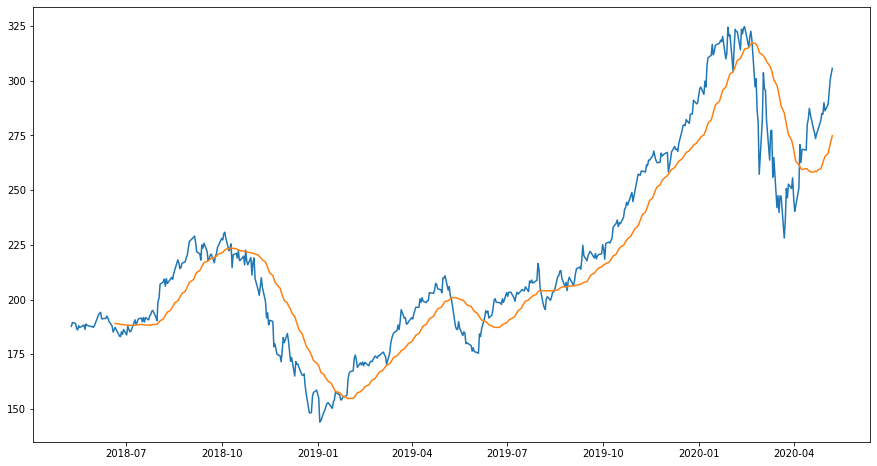

In [20]:
plt.figure(figsize=(15,8))
plt.plot(df.Open)
plt.plot(df['Open'].rolling(30).mean())

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [23]:
df.diff().head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,1.75,-0.309997,-0.199997,-1.449997,-0.700837,-1777100.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [25]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800


In [27]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,0.009321,-0.001628,-0.001066,-0.007630,-0.003803,-0.063492
2018-05-14,-0.002533,-0.002789,0.002187,-0.002333,-0.002333,-0.207285
2018-05-15,-0.011798,-0.012979,-0.014692,-0.009088,-0.009088,0.140355
2018-05-16,-0.003801,0.007430,0.004862,0.009333,0.009332,-0.190423


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

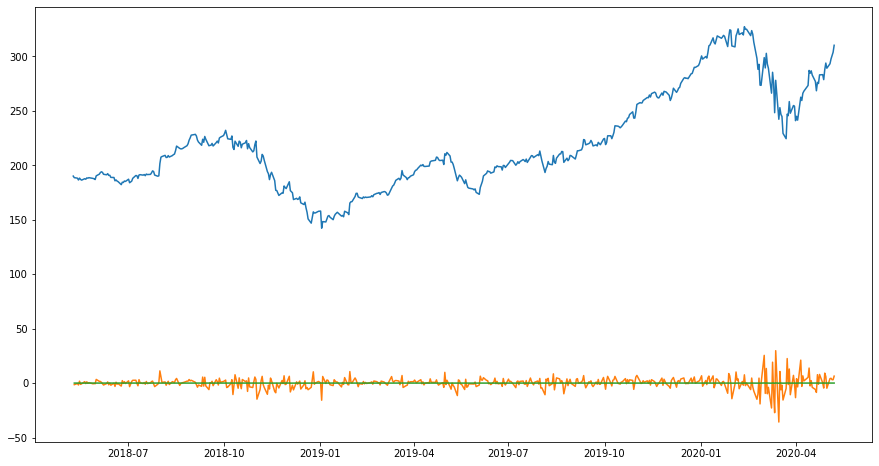

In [31]:
plt.figure(figsize=(15,8))
plt.plot(df.Close)
plt.plot(df['Close'].diff())
plt.plot(df['Close'].pct_change())

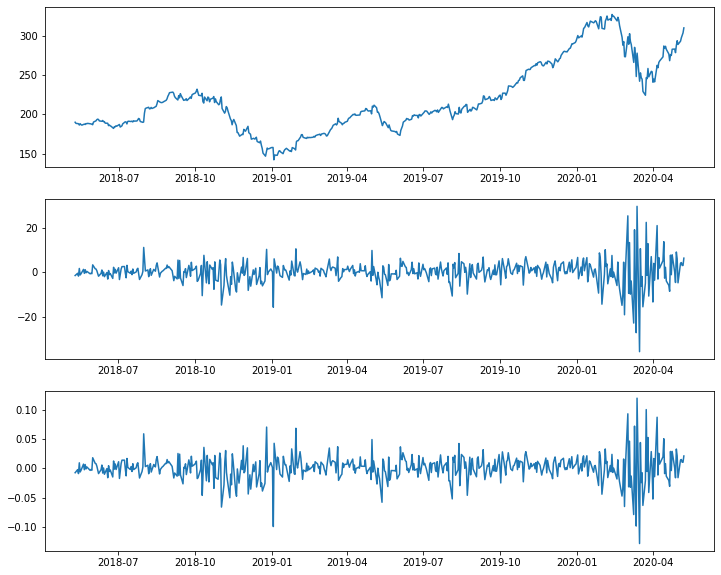

In [32]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))
axes[0].plot(df['Close'])
axes[1].plot(df['Close'].diff())
axes[2].plot(df['Close'].pct_change())

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [35]:
df.shift(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,187.740005,190.369995,187.649994,190.039993,184.272324,27989300.0
2018-05-16,189.490005,190.059998,187.449997,188.589996,183.571487,26212200.0
...,...,...,...,...,...,...
2020-05-04,284.730011,289.670013,283.890015,287.730011,286.953247,34320200.0
2020-05-05,289.959991,294.529999,288.350006,293.799988,293.006836,45766000.0
2020-05-06,286.250000,299.000000,285.850006,289.070007,288.289612,60154200.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [ ]:
# Trying to predict today's closing price features: 
# yesterday's closing price and today's opening price. 

In [39]:
pd.concat([
    df[['Open']],
    df[['Open','Close']].shift().rename(columns={'Open': 'Open_1','Close': 'Close_1'}),
    df[['Close']]
], axis=1).dropna() # adding columns, not rows

,Open,Open_1,Close_1,Close
Date,,,,
2018-05-11,189.490005,187.740005,190.039993,188.589996
2018-05-14,189.009995,189.490005,188.589996,188.149994
2018-05-15,186.779999,189.009995,188.149994,186.440002
2018-05-16,186.070007,186.779999,186.440002,188.179993
2018-05-17,188.000000,186.070007,188.179993,186.990005
...,...,...,...,...
2020-05-04,289.170013,286.250000,289.070007,293.160004
2020-05-05,295.059998,289.170013,293.160004,297.559998
2020-05-06,300.459991,295.059998,297.559998,300.630005


In [ ]:
X = df2.drop(columns='Close')
y = df2['Close']